In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import imutils
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [5]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [6]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [7]:
def draw_styled_landmarks(image, results):    
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=2)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=1, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(89,122,255), thickness=1, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(29,226,200), thickness=1, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(29,226,200), thickness=1, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(153,255,51), thickness=1, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(153,51,255), thickness=1, circle_radius=2)
                                 )

In [8]:
# IGNORE
cap = cv2.VideoCapture(0)

# Set mediapipe model, if you want higher or lower, change confidence number
with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
draw_styled_landmarks(frame, results)

In [10]:
# IGNORE
results

mediapipe.python.solution_base.SolutionOutputs

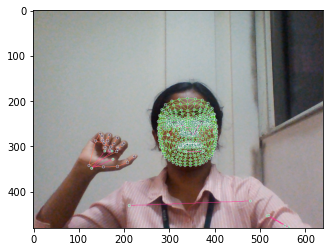

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [12]:
# IGNORE
cap = cv2.VideoCapture(0)
while cap.isOpened():
    
    # Read Feed
    ret, frame = cap.read()
    
    # Show to Screen
    cv2.imshow('OpenCV Feed', frame)
    
    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [13]:
# IGNORE
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
# IGNORE
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
pose

array([ 5.53880811e-01,  5.77557504e-01, -1.20978463e+00,  9.99870598e-01,
        5.74828207e-01,  5.22819877e-01, -1.14079738e+00,  9.99823868e-01,
        5.90008438e-01,  5.24051666e-01, -1.14068866e+00,  9.99751627e-01,
        6.02828383e-01,  5.25788665e-01, -1.14050639e+00,  9.99724448e-01,
        5.24009049e-01,  5.27445853e-01, -1.13206291e+00,  9.99865115e-01,
        5.05550385e-01,  5.31135619e-01, -1.13229179e+00,  9.99870777e-01,
        4.88644183e-01,  5.35867393e-01, -1.13233161e+00,  9.99901414e-01,
        6.24949217e-01,  5.59246063e-01, -6.85871840e-01,  9.99664187e-01,
        4.68077511e-01,  5.74162602e-01, -6.77626431e-01,  9.99922752e-01,
        5.87374806e-01,  6.49897814e-01, -1.05081570e+00,  9.99789953e-01,
        5.26041627e-01,  6.49011612e-01, -1.04667878e+00,  9.99894083e-01,
        7.49584794e-01,  8.77005339e-01, -4.04635340e-01,  9.93378580e-01,
        3.31571072e-01,  8.95984948e-01, -3.86491954e-01,  9.98325884e-01,
        9.15116906e-01,  

In [19]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [61]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('FinalM-P') 

# Actions that we try to detect
actions = np.array(['Q','R','S','T','U','V'])

# Five videos worth of data
no_sequences = 5

# Videos are going to be 5 frames in length
sequence_length = 5

In [62]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [79]:
# IGNORE
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    for action in actions:
        # Loop through sequences aka videos : 20 Videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length : 5 Frames
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()
                frame = imutils.resize(frame,width = 500,height = 1000)

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                # print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(5000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [80]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'Q': 0, 'R': 1, 'S': 2, 'T': 3, 'U': 4, 'V': 5}

In [81]:
sequences, labels = [], []
no_sequences = 5
sequence_length = 5
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
        
np.array(sequences).shape
np.array(labels).shape
X = np.array(sequences)
X.shape
y = to_categorical(labels).astype(int)
y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
y_test.shape
X_train.shape

(28, 5, 1662)

In [82]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(5,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [83]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [84]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
1/1 [==============================] - 6s 6s/step - loss: 1.7904 - categorical_accuracy: 0.2143
Epoch 2/500
1/1 [==============================] - 0s 185ms/step - loss: 1.7842 - categorical_accuracy: 0.1786
Epoch 3/500
1/1 [==============================] - 0s 100ms/step - loss: 1.7835 - categorical_accuracy: 0.1786
Epoch 4/500
1/1 [==============================] - 0s 100ms/step - loss: 1.7706 - categorical_accuracy: 0.1786
Epoch 5/500
1/1 [==============================] - 0s 85ms/step - loss: 1.7367 - categorical_accuracy: 0.1786
Epoch 6/500
1/1 [==============================] - 0s 100ms/step - loss: 1.7036 - categorical_accuracy: 0.1786
Epoch 7/500
1/1 [==============================] - 0s 138ms/step - loss: 1.6763 - categorical_accuracy: 0.3214
Epoch 8/500
1/1 [==============================] - 0s 116ms/step - loss: 1.6108 - categorical_accuracy: 0.3571
Epoch 9/500
1/1 [==============================] - 0s 138ms/step - loss: 1.5558 - categorical_accuracy: 0.5357
Epoch

1/1 [==============================] - 0s 85ms/step - loss: 0.5691 - categorical_accuracy: 0.7143
Epoch 75/500
1/1 [==============================] - 0s 69ms/step - loss: 0.5210 - categorical_accuracy: 0.7143
Epoch 76/500
1/1 [==============================] - 0s 116ms/step - loss: 0.5551 - categorical_accuracy: 0.7143
Epoch 77/500
1/1 [==============================] - 0s 100ms/step - loss: 0.5218 - categorical_accuracy: 0.7143
Epoch 78/500
1/1 [==============================] - 0s 116ms/step - loss: 0.4415 - categorical_accuracy: 0.9286
Epoch 79/500
1/1 [==============================] - 0s 100ms/step - loss: 0.4507 - categorical_accuracy: 0.8571
Epoch 80/500
1/1 [==============================] - 0s 122ms/step - loss: 0.5121 - categorical_accuracy: 0.7500
Epoch 81/500
1/1 [==============================] - 0s 132ms/step - loss: 0.4867 - categorical_accuracy: 0.7857
Epoch 82/500
1/1 [==============================] - 0s 100ms/step - loss: 0.4074 - categorical_accuracy: 0.9286
Epoch 8

1/1 [==============================] - 0s 100ms/step - loss: 1.9223e-04 - categorical_accuracy: 1.0000
Epoch 147/500
1/1 [==============================] - 0s 69ms/step - loss: 1.8392e-04 - categorical_accuracy: 1.0000
Epoch 148/500
1/1 [==============================] - 0s 100ms/step - loss: 1.7580e-04 - categorical_accuracy: 1.0000
Epoch 149/500
1/1 [==============================] - 0s 63ms/step - loss: 1.6823e-04 - categorical_accuracy: 1.0000
Epoch 150/500
1/1 [==============================] - 0s 53ms/step - loss: 1.6128e-04 - categorical_accuracy: 1.0000
Epoch 151/500
1/1 [==============================] - 0s 85ms/step - loss: 1.5506e-04 - categorical_accuracy: 1.0000
Epoch 152/500
1/1 [==============================] - 0s 116ms/step - loss: 1.4955e-04 - categorical_accuracy: 1.0000
Epoch 153/500
1/1 [==============================] - 0s 154ms/step - loss: 1.4450e-04 - categorical_accuracy: 1.0000
Epoch 154/500
1/1 [==============================] - 0s 216ms/step - loss: 1.3979e

1/1 [==============================] - 0s 116ms/step - loss: 1.0460e-05 - categorical_accuracy: 1.0000
Epoch 217/500
1/1 [==============================] - 0s 154ms/step - loss: 1.0039e-05 - categorical_accuracy: 1.0000
Epoch 218/500
1/1 [==============================] - 0s 100ms/step - loss: 9.5919e-06 - categorical_accuracy: 1.0000
Epoch 219/500
1/1 [==============================] - 0s 69ms/step - loss: 9.1406e-06 - categorical_accuracy: 1.0000
Epoch 220/500
1/1 [==============================] - 0s 78ms/step - loss: 8.7532e-06 - categorical_accuracy: 1.0000
Epoch 221/500
1/1 [==============================] - 0s 69ms/step - loss: 8.4296e-06 - categorical_accuracy: 1.0000
Epoch 222/500
1/1 [==============================] - 0s 85ms/step - loss: 8.1018e-06 - categorical_accuracy: 1.0000
Epoch 223/500
1/1 [==============================] - 0s 100ms/step - loss: 7.7655e-06 - categorical_accuracy: 1.0000
Epoch 224/500
1/1 [==============================] - 0s 147ms/step - loss: 7.4675e

1/1 [==============================] - 0s 85ms/step - loss: 1.8903e-06 - categorical_accuracy: 1.0000
Epoch 287/500
1/1 [==============================] - 0s 85ms/step - loss: 1.8775e-06 - categorical_accuracy: 1.0000
Epoch 288/500
1/1 [==============================] - 0s 100ms/step - loss: 1.8350e-06 - categorical_accuracy: 1.0000
Epoch 289/500
1/1 [==============================] - 0s 116ms/step - loss: 1.8137e-06 - categorical_accuracy: 1.0000
Epoch 290/500
1/1 [==============================] - 0s 100ms/step - loss: 1.7924e-06 - categorical_accuracy: 1.0000
Epoch 291/500
1/1 [==============================] - 0s 100ms/step - loss: 1.7754e-06 - categorical_accuracy: 1.0000
Epoch 292/500
1/1 [==============================] - 0s 116ms/step - loss: 1.7498e-06 - categorical_accuracy: 1.0000
Epoch 293/500
1/1 [==============================] - 0s 78ms/step - loss: 1.7243e-06 - categorical_accuracy: 1.0000
Epoch 294/500
1/1 [==============================] - 0s 85ms/step - loss: 1.7158e

1/1 [==============================] - 0s 69ms/step - loss: 9.5793e-07 - categorical_accuracy: 1.0000
Epoch 357/500
1/1 [==============================] - 0s 132ms/step - loss: 9.4942e-07 - categorical_accuracy: 1.0000
Epoch 358/500
1/1 [==============================] - 0s 138ms/step - loss: 9.4090e-07 - categorical_accuracy: 1.0000
Epoch 359/500
1/1 [==============================] - 0s 132ms/step - loss: 9.2813e-07 - categorical_accuracy: 1.0000
Epoch 360/500
1/1 [==============================] - 0s 116ms/step - loss: 9.1961e-07 - categorical_accuracy: 1.0000
Epoch 361/500
1/1 [==============================] - 0s 185ms/step - loss: 9.1961e-07 - categorical_accuracy: 1.0000
Epoch 362/500
1/1 [==============================] - 0s 116ms/step - loss: 9.1110e-07 - categorical_accuracy: 1.0000
Epoch 363/500
1/1 [==============================] - 0s 194ms/step - loss: 8.9833e-07 - categorical_accuracy: 1.0000
Epoch 364/500
1/1 [==============================] - 0s 154ms/step - loss: 8.94

1/1 [==============================] - 0s 85ms/step - loss: 5.9179e-07 - categorical_accuracy: 1.0000
Epoch 427/500
1/1 [==============================] - 0s 85ms/step - loss: 5.8327e-07 - categorical_accuracy: 1.0000
Epoch 428/500
1/1 [==============================] - 0s 78ms/step - loss: 5.7902e-07 - categorical_accuracy: 1.0000
Epoch 429/500
1/1 [==============================] - 0s 123ms/step - loss: 5.7902e-07 - categorical_accuracy: 1.0000
Epoch 430/500
1/1 [==============================] - 0s 132ms/step - loss: 5.7902e-07 - categorical_accuracy: 1.0000
Epoch 431/500
1/1 [==============================] - 0s 185ms/step - loss: 5.7050e-07 - categorical_accuracy: 1.0000
Epoch 432/500
1/1 [==============================] - 0s 116ms/step - loss: 5.7050e-07 - categorical_accuracy: 1.0000
Epoch 433/500
1/1 [==============================] - 0s 138ms/step - loss: 5.7050e-07 - categorical_accuracy: 1.0000
Epoch 434/500
1/1 [==============================] - 0s 317ms/step - loss: 5.6624

1/1 [==============================] - 0s 85ms/step - loss: 4.0020e-07 - categorical_accuracy: 1.0000
Epoch 497/500
1/1 [==============================] - 0s 69ms/step - loss: 3.9594e-07 - categorical_accuracy: 1.0000
Epoch 498/500
1/1 [==============================] - 0s 100ms/step - loss: 3.9594e-07 - categorical_accuracy: 1.0000
Epoch 499/500
1/1 [==============================] - 0s 116ms/step - loss: 3.9594e-07 - categorical_accuracy: 1.0000
Epoch 500/500
1/1 [==============================] - 0s 85ms/step - loss: 3.9594e-07 - categorical_accuracy: 1.0000


In [85]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 5, 64)             442112    
                                                                 
 lstm_13 (LSTM)              (None, 5, 128)            98816     
                                                                 
 lstm_14 (LSTM)              (None, 64)                49408     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 6)                 198       
                                                                 
Total params: 596,774
Trainable params: 596,774
Non-tr

In [86]:
res = model.predict(X_test)

model.save('action2.h5')

In [87]:
model.load_weights('action2.h5')

In [88]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
# IGNORE
#multilabel_confusion_matrix??

# [True Negative][False Positive]
# [False Negative][True Postive]
multilabel_confusion_matrix(ytrue,yhat)

array([[[1, 0],
        [0, 1]],

       [[1, 0],
        [0, 1]]], dtype=int64)

In [89]:
accuracy_score(ytrue, yhat)

1.0

In [90]:
from scipy import stats
colors = [(245,117,16), (117,245,16), (16,117,245), (116,127,145), (10,287,15),(12,267,125),(1,234,235)
          ,(10,145,189),(24,165,134),(145,146,147),(234,215,217),(123,124,125),(145,156,100),(130,100,179)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame


In [92]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        
        # Resize Feed to be bigger
        frame = imutils.resize(frame,width = 1000,height = 1000)

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-5:]
        
        if len(sequence) == 5:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-5:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (1,0), (700, 40), (245, 117, 16), -1)
        
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('m'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [39]:
# IGNORE
# Call If webcame is still Focused
cap.release()
cv2.destroyAllWindows()

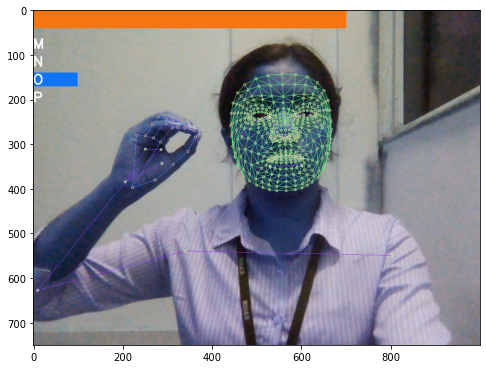

In [40]:
plt.figure(figsize=(8,8))
plt.imshow(prob_viz(res, actions, image, colors))